Saving Bitcoin BEP2 (2) (1).csv to Bitcoin BEP2 (2) (1).csv
✅ Using file: Bitcoin BEP2 (2) (1).csv
Preview of the dataset:


,Date,Open,High,Low,Close,Volume,Currency
0,6/18/2019,9128.269531,9149.763672,8988.606445,9062.045898,952850,USD
1,6/19/2019,9068.174805,9277.677734,9051.094727,9271.459961,131077,USD
2,6/20/2019,9271.567383,9573.689453,9209.416992,9519.200195,83052,USD
3,6/21/2019,9526.833984,10130.935550,9526.833984,10127.998050,76227,USD
4,6/22/2019,10151.890630,11171.013670,10083.189450,10719.981450,84485,USD



Detected price columns: ['Open', 'High', 'Low', 'Close']


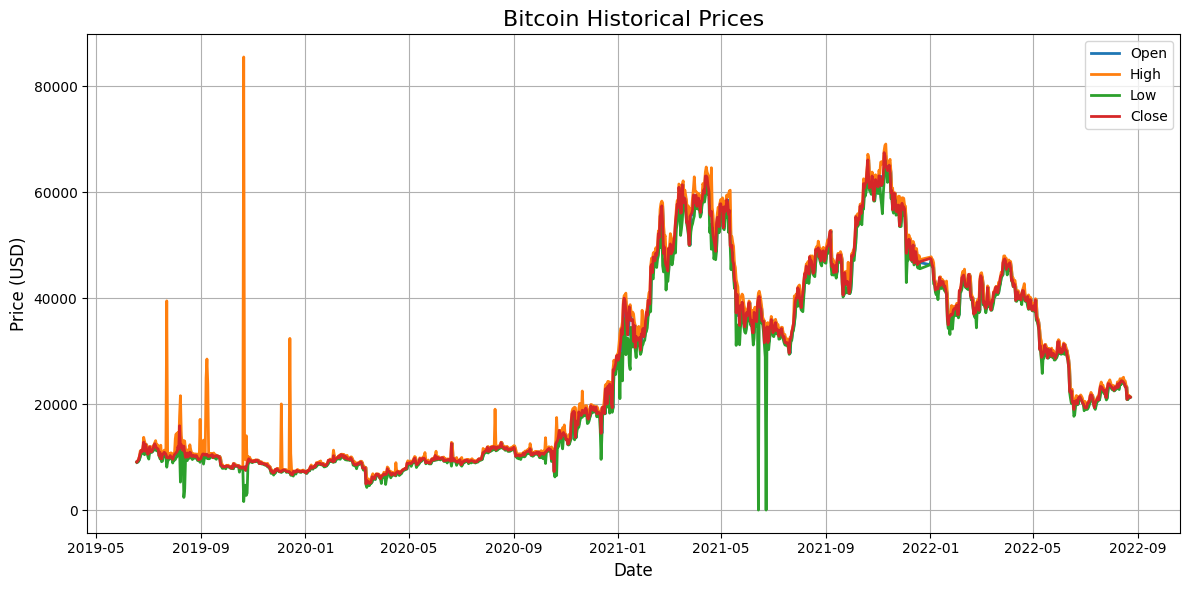

In [2]:
# ===========================================
# 1. IMPORT LIBRARIES
# ===========================================
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ===========================================
# 2. UPLOAD CSV FILE MANUALLY (COLAB STYLE)
# ===========================================
uploaded = files.upload()

# Automatically use the uploaded filename
filename = list(uploaded.keys())[0]
print("✅ Using file:", filename)

# ===========================================
# 3. LOAD YOUR DATA
# ===========================================
df = pd.read_csv(filename)
print("Preview of the dataset:")
display(df.head())

# ===========================================
# 4. CLEAN AND PREPARE DATA
# ===========================================
df.columns = df.columns.str.strip()

# Detect date column
date_col = [col for col in df.columns if 'date' in col.lower()][0]
df[date_col] = pd.to_datetime(df[date_col])
df = df.sort_values(by=date_col)

# Identify price columns
price_cols = [col for col in df.columns if any(x in col.lower() for x in ['open', 'high', 'low', 'close'])]

print("\nDetected price columns:", price_cols)

# ===========================================
# 5. PLOT THE HISTORICAL PRICES
# ===========================================
plt.figure(figsize=(12, 6))

for col in price_cols:
    plt.plot(df[date_col], df[col], label=col.capitalize(), linewidth=2)

plt.title("Bitcoin Historical Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
